## Installation

The pywapor package depends on several other packages, most of them get installed automatically when we install pywapor.

*The GDAL package needs to be installed manually however.*

Luckily, it is **already installed** on the backend computer used by **Google Colab**. We can verify that GDAL is installed by running the following commands.

In [1]:
from osgeo import gdal
print("Using gdal version", gdal.__version__)

Using gdal version 3.3.2


In [2]:
# Install pyWaPOR
!pip install pywapor --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 886.2/886.2 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 63.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 69.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 59.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 234.2/234.2 kB 14.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 56.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 354.0/354.0 kB 27.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.5/53.5 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 33.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.8/48.8 kB 4.4 MB/s eta 0:0

In [3]:
import pywapor
print("Using pywapor version:", pywapor.__version__)

Using pywapor version: 3.3.5


In [4]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

## ETLook Input
First need to download and prepare the necessary inputs.

The pywapor package has a function that can collect all this data from selected sources and make sure the data is stored in the correct format.

### Basic Configuration **(Needs NASA Earthdata Login Details)**
Collecting MODIS and MERRA2 Datasets

Sign up: https://urs.earthdata.nasa.gov/home

⚠️ After creating your account, you still need to accept some ‘Terms of Use’, before you can continue with this notebook.

  To do that, login to your newly created account and go to

`Applications > Authorized Apps > Approve More Applications`

There, make sure the two following applications are authorized:
1. `NASA GESDISC DATA ARCHIVE `
2. `LP DAAC OPeNDAP`

In [5]:
pywapor.collect.accounts.setup("NASA")

NASA username: mickyskye
NASA password: ··········


In [6]:
# User inputs
project_folder = r"/content/default_pywapor_notebooks_1"
# Time period: default composite length of pyWAPOR 10 days
timelim = ["2023-01-01", "2023-01-31"]
composite_length = "DEKAD"
level = "level_1"
sources = pywapor.general.levels.pre_et_look_levels(level)
# Bounding box of AOI
latlim = [-34, -33] # first value refers to the southern border
lonlim = [19, 20] # first value refers to the western border

In [7]:
# Have a closer look at what level_1 data means
# The dictionary specifies for each variable which products are used (and configures a couple other settings)
# Note: is_example property defines which product is used to align all the other datasets spatially
sources["ndvi"]

{'products': [{'source': 'MODIS',
   'product_name': 'MOD13Q1.061',
   'enhancers': 'default',
   'is_example': True},
  {'source': 'MODIS', 'product_name': 'MYD13Q1.061', 'enhancers': 'default'}],
 'composite_type': 'mean',
 'temporal_interp': 'linear',
 'spatial_interp': 'nearest'}

In [8]:
# Download and prepare input data
ds  = pywapor.pre_et_look.main(project_folder, latlim, lonlim, timelim, bin_length=composite_length)

> PRE_ET_LOOK
    --> Collecting `ndvi` from `MODIS.MOD13Q1.061`.
        --> Applying 'mask_qa' to `ndvi`.
        --> Saving merged data.
            > peak-memory-usage: 5.1MB, execution-time: 0:00:03.149990.
            > chunksize|dimsize: [time: 3|3, y: 389|389, x: 390|390]
            > timesize: 3 [2023-01-09T00:00, ..., 2023-02-10T00:00]
    --> Collecting `ndvi` from `MODIS.MYD13Q1.061`.
        --> Applying 'mask_qa' to `ndvi`.
        --> Saving merged data.
            > peak-memory-usage: 5.2MB, execution-time: 0:00:02.179422.
            > chunksize|dimsize: [time: 3|3, y: 389|389, x: 390|390]
            > timesize: 3 [2023-01-04T00:00, ..., 2023-02-02T00:00]
    --> Collecting `r0` from `MODIS.MCD43A3.061`.
        --> Applying 'shortwave_r0' to `r0`.
        --> Applying 'mask_qa' to `r0`.
        --> Saving merged data.
            > peak-memory-usage: 17.3MB, execution-time: 0:00:02.213605.
            > chunksize|dimsize: [time: 38|38, y: 199|199, x: 200|200]
     

In [9]:
# To see the file the dataset is stored in
fh = ds.encoding["source"]
print(fh)

/content/default_pywapor_notebooks_1/et_look_in.nc


In [10]:
# To import the file the dataset is stored in (et_look_in.nc) (if you don't want to run pre_et_look again)
# The decode_coords keyword is used to make sure CRS info is loaded correctly.
ds = xr.open_dataset(fh, decode_coords = "all")

In [11]:
# Take a closer look at the contents of the datasets
# This variable contains a xarray.Dataset which is a Python-package that let's you work with large multi-dimensional datasets.
ds

<xarray.Dataset>
Dimensions:              (x: 390, y: 389, time_bins: 3)
Coordinates:
  * x                    (x) float64 19.0 19.0 19.01 19.01 ... 19.99 20.0 20.0
  * y                    (y) float64 -33.0 -33.0 -33.01 ... -33.99 -34.0 -34.0
    spatial_ref          int64 ...
  * time_bins            (time_bins) datetime64[ns] 2023-01-01 ... 2023-01-21
Data variables: (12/78)
    ndvi                 (time_bins, y, x) float64 ...
    r0                   (time_bins, y, x) float64 ...
    se_root              (time_bins, y, x) float64 ...
    p_24                 (time_bins, y, x) float64 ...
    z                    (y, x) float64 ...
    ra_24                (time_bins, y, x) float64 ...
    ...                   ...
    o2                   float64 ...
    co2_ref              int64 ...
    gcgdm                float64 ...
    phot_eff             float64 ...
    r0_bare              float64 ...
    r0_full              float64 ...

In [12]:
# Access the coordinate reference system and boundaries
print(ds.rio.crs)
print(ds.rio.bounds())
print(ds.rio.resolution())

EPSG:4326
(18.99944422117687, -33.99989559851603, 20.000865903893807, -33.00104166370348)
(0.0025677479044024093, -0.0025677479044024136)


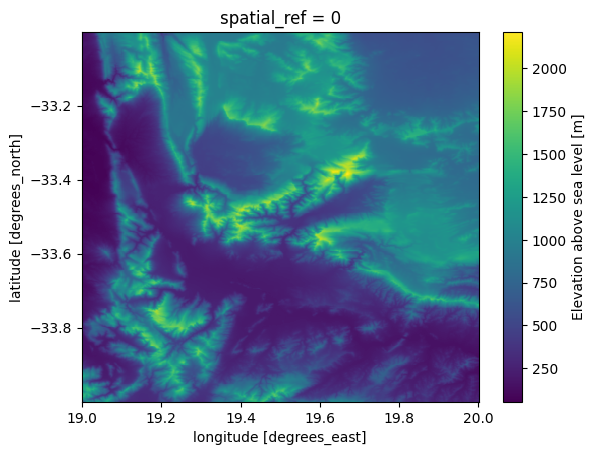

In [13]:
# XArray datasets are also easy to plot and smart enough to automatically fill in the units and the description of the variable.
ds.z.plot()

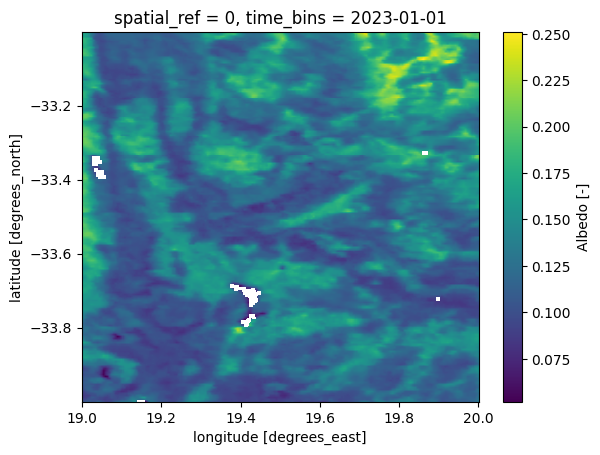

In [14]:
# Make a map of a 3-dimensional variable, we will have to select for which time.
ds.r0.isel(time_bins = 0).plot()

## Running ETLook

In [15]:
ds_out = pywapor.et_look.main(ds)

> ET_LOOK
    --> Running `et_look` (v2).
    --> Calculating `declination`.
    --> Calculating `inverse_earth_sun_distance`.
    --> Calculating `vegetation_cover`.
    --> Calculating `leaf_area_index`.
    --> Calculating `effective_leaf_area_index`.
    --> Calculating `soil_fraction`.
    --> Calculating `latitude_rad`.
    --> Calculating `sunset_hour_angle`.
    --> Calculating `daily_solar_radiation_toa_flat`.
    --> Calculating `transmissivity`.
    --> Calculating `stress_radiation`.
    --> Calculating `air_pressure_kpa2mbar`.
    --> Calculating `air_pressure_daily`.
    --> Calculating `air_pressure`.
    --> Calculating `vapour_pressure_from_specific_humidity_daily`.
    --> Calculating `vapour_pressure_from_specific_humidity`.
    --> Calculating `saturated_vapour_pressure`.
    --> Calculating `vapour_pressure_deficit_daily`.
    --> Calculating `vapour_pressure_deficit`.
    --> Calculating `stress_vpd`.
    --> Calculating `stress_temperature`.
    --> Calculating `

In [16]:
# Check the contents of the new dataset
ds_out

<xarray.Dataset>
Dimensions:       (time_bins: 3, y: 389, x: 390)
Coordinates:
  * x             (x) float64 19.0 19.0 19.01 19.01 ... 19.99 19.99 20.0 20.0
  * y             (y) float64 -33.0 -33.0 -33.01 -33.01 ... -33.99 -34.0 -34.0
    spatial_ref   int64 ...
  * time_bins     (time_bins) datetime64[ns] 2023-01-01 2023-01-11 2023-01-21
Data variables:
    int_mm        (time_bins, y, x) float64 dask.array<chunksize=(1, 389, 390), meta=np.ndarray>
    t_24_mm       (time_bins, y, x) float64 dask.array<chunksize=(1, 389, 390), meta=np.ndarray>
    e_24_mm       (time_bins, y, x) float64 dask.array<chunksize=(1, 389, 390), meta=np.ndarray>
    et_24_mm      (time_bins, y, x) float64 dask.array<chunksize=(1, 389, 390), meta=np.ndarray>
    et_ref_24_mm  (time_bins, y, x) float64 dask.array<chunksize=(1, 389, 390), meta=np.ndarray>
    se_root       (time_bins, y, x) float64 dask.array<chunksize=(1, 389, 390), meta=np.ndarray>
    npp           (time_bins, y, x) float64 dask.array<chunksize=(1, 389, 390), meta=np.ndarray>

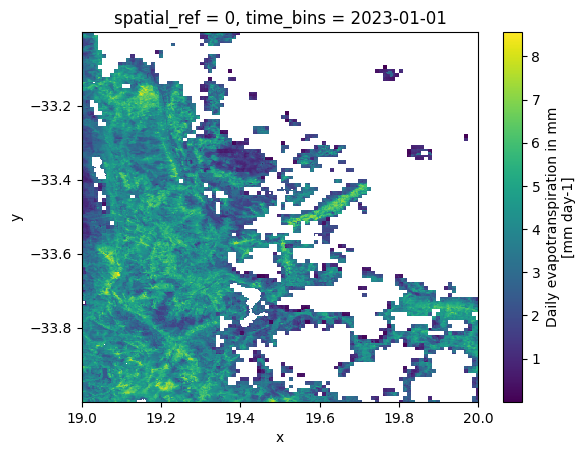

In [17]:
# Plot the daily evapotranspiration in mm
ds_out.et_24_mm.isel(time_bins = 0).plot()

In [18]:
# Note these calculations loads the array into working memory
et_data = ds_out.et_24_mm.isel(time_bins = 0).values
print("resolution:", et_data.shape)
print("total pixels:", et_data.size)
print("number of pixels with missing data:", np.sum(np.isnan(et_data)))
print("maximum value: {0:.2f}".format(np.nanmax(et_data)))
print("minimum value: {0:.2f}".format(np.nanmin(et_data)))
print("mean: {0:.2f}".format(np.nanmean(et_data)))
print("median: {0:.2f}".format(np.nanmedian(et_data)))

resolution: (389, 390)
total pixels: 151710
number of pixels with missing data: 76036
maximum value: 8.56
minimum value: 0.00
mean: 3.64
median: 3.73


In [ ]:
# If you want to output all variables
# ds_out_all = pywapor.et_look.main(ds, export_vars = "all")